<a href="https://colab.research.google.com/github/belhouariayoub/PROJETEMBIA/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys, os, array, time
import numpy as np
import matplotlib.pyplot as plt
import IPython

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dropout,Dense
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.gen_array_ops import mirror_pad_eager_fallback

from sklearn.utils import shuffle

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/EMBEDDEDIA/Saline_bottle_original_size/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EMBEDDEDIA/Saline_bottle_original_size


In [ ]:
!ls

 data_label   resize_sal_data_augmented   test3.jpg  't=y_test.npy'   Y_org.npy
 Model2.h5    resize_sal_data_temp_del	  test4.jpg   X_org.npy
 Model.h5     test1.jpg			  test.jpg    x_test.npy


In [ ]:
X_data = []
Y_data = []
X_data=np.load('X_org.npy')/255
Y_data=np.load('Y_org.npy')
X, Y = shuffle(X_data,Y_data)
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)
#x_train=x_train.reshape(-1,64,64,3)
#x_test=x_test.reshape(-1,64,64,3)
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
#x_train=np.reshape(x_train,(3162,-1))


########
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
x_train[0].shape

(64, 64, 3)

In [ ]:
# Small CNN for MNIST recognition
model = models.Sequential()
# Dense layer
#model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#spacial dropout
model.add(layers.SpatialDropout2D(0.2)) 
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
#model.add(Dropout(0.2))     
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
model.add(Dropout(0.3)) #0.3
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) #128
model.add(Dropout(0.3)) #
model.add(layers.Dense(4, activation='softmax'))
model.summary()
######
batch_size=128
epochs=50
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 spatial_dropout2d_1 (Spatia  (None, 30, 30, 32)       0         
 lDropout2D)                                                     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                      

33/33 - 2s - loss: 0.2151 - accuracy: 0.9479 - 2s/epoch - 57ms/step


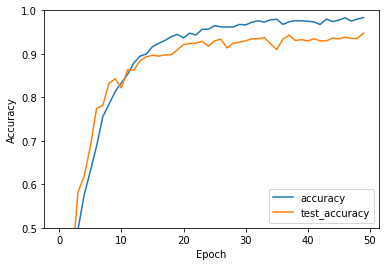

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [ ]:
model.save('Model2.h5')
with open('x_test.npy', 'wb') as f:
   np.save(f,x_test)

In [ ]:
with open('t=y_test.npy', 'wb') as f:
   np.save(f,y_test)

In [ ]:
from PIL import Image
import PIL.ImageOps  
import cv2
from PIL import Image as pil_image
list_input=['100%','50%','80%','empty']
img=pil_image.open("test.jpg")
np_im = np.array(img)/255


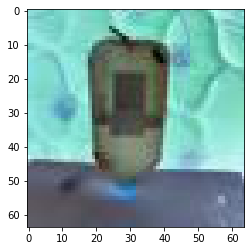

In [ ]:
plt.imshow(np_im.reshape(64,64,3))

In [ ]:
np_im=np_im.reshape(1,64,64,3)

In [ ]:
b=np.argmax(prediction)
print(list_input[b])

NameError: ignored